# 1. Basic Preprocessing

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, ConfusionMatrixDisplay, classification_report
from collections import Counter

## Feature Description

> HighBP : Indicates if the person has been told by a health professional that they have High Blood   Pressure.

>HighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.

>CholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.

>BMI : Body Mass Index, calculated by dividing the persons weight (in kilogram) by the square of their height (in meters).

>Smoker : Indicates if the person has smoked at least 100 cigarettes.

>Stroke : Indicates if the person has a history of stroke.

>Diabetes : Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.

>PhysActivity : Indicates if the person has some form of physical activity in their day-to-day routine.

>Fruits : Indicates if the person consumes 1 or more fruit(s) daily.

>Veggies : Indicates if the person consumes 1 or more vegetable(s) daily.

>HvyAlcoholConsump : Indicates if the person has more than 14 drinks per week.

>AnyHealthcare : Indicates if the person has any form of health insurance.

>NoDocbcCost : Indicates if the person wanted to visit a doctor within the past 1 year but couldn’t, due to cost.

>GenHlth : Indicates the persons response to how well is their general health, ranging from 1 (excellent) to 5 (poor).

>Menthlth : Indicates the number of days, within the past 30 days that the person had bad mental health.

>PhysHlth : Indicates the number of days, within the past 30 days that the person had bad physical health.

>DiffWalk : Indicates if the person has difficulty while walking or climbing stairs.

In [2]:
#Import data
data = pd.read_csv("data.csv")
data.shape

(253680, 19)

In [3]:
#Dropping duplicates
data = data.drop_duplicates()
data.shape

(181906, 19)

In [4]:
#Summary of data
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
count,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000,181906.000000
mean,0.123388,0.481831,0.463685,0.952800,29.179351,0.485635,0.055924,0.383737,0.691604,0.585539,0.767660,0.070542,0.934554,0.115092,2.749387,4.359708,5.815899,0.229371,8.057183
std,0.328883,0.499671,0.498681,0.212067,7.247375,0.499795,0.229776,0.771570,0.461832,0.492630,0.422326,0.256059,0.247312,0.319134,1.083672,8.413715,9.771832,0.420430,3.103509
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,4.000000,6.000000,0.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000


In [5]:
#All our columns are numerical
num_cols = [col for col in data.columns if data[col].dtype != "O"]
len(num_cols)

19

In [6]:
#Checking for missing values in the dataset
data.isna().sum().sum()

0

In [7]:
#Splitting into x and y
X = data.drop('HeartDiseaseorAttack', axis = 1)
y = data['HeartDiseaseorAttack']

In [8]:
data_when0 =  data.loc[data.HeartDiseaseorAttack == 0]
data_when1 = data.loc[data.HeartDiseaseorAttack == 1]

In [9]:
print(f"data_when0 shape: {data_when0.shape}")
print(f"data_when1 shape: {data_when1.shape}")

data_when0 shape: (159461, 19)
data_when1 shape: (22445, 19)


In [10]:
data_when1.HeartDiseaseorAttack.value_counts()

HeartDiseaseorAttack
1    22445
Name: count, dtype: int64

In [11]:
y.value_counts()
#14% of our data is 1 and the rest 86% is 0
#Our dataset is clearly imbalanced

HeartDiseaseorAttack
0    159461
1     22445
Name: count, dtype: int64

# 2. EDA

In [12]:
#general info about featuresa
features = X.columns
nuniques = [X[col].nunique() for col in features]

summary = pd.concat([pd.Series(features, name = 'Features'),
                     pd.Series(nuniques, name = "Unique values")], axis = 1)
summary

,Features,Unique values
0,HighBP,2
1,HighChol,2
2,CholCheck,2
3,BMI,84
4,Smoker,2
5,Stroke,2
6,Diabetes,3
7,PhysActivity,2
8,Fruits,2
9,Veggies,2


## 2.1 Looking at Binary columns

In [13]:
binary_cols = [col for col in features if X[col].nunique() == 2]
len(binary_cols)
#out of 18 we have 12 columns repped by 0, 1

12

In [19]:
binarycol_analysis_when_HeartAttack = pd.DataFrame()
for col in binary_cols:
#     counter_0 = Counter(data_when0[col])
    counter_1 = Counter(data_when1[col])
    data = [round(val * 100 / len(data_when1), 2) for val in counter_1.values()]
    temp = pd.Series(data = data, index = counter_1.keys(), name = f"{col}")
    binarycol_analysis_when_HeartAttack = pd.concat([binarycol_analysis_when_HeartAttack, temp],
                                                    axis = 1)
print("For People who have had Heart Related Ailments")
binarycol_analysis_when_HeartAttack.T

For People who have had Heart Related Ailments


,1,0
HighBP,74.57,25.43
HighChol,69.28,30.72
CholCheck,98.79,1.21
Smoker,62.07,37.93
Stroke,17.44,82.56
PhysActivity,62.33,37.67
Fruits,59.26,40.74
Veggies,75.28,24.72
HvyAlcoholConsump,3.76,96.24
AnyHealthcare,96.13,3.87


In [20]:
binarycol_analysis_when_NoHeartAttack = pd.DataFrame()
len(binary_cols)
#out of 18 we have 12 columns repped by 0, 1
for col in binary_cols:
#     counter_0 = Counter(data_when0[col])
    counter_1 = Counter(data_when0[col])
    data = [round(val * 100 / len(data_when0), 2) for val in counter_1.values()]
    temp = pd.Series(data = data, index = counter_1.keys(), name = f"{col}")
    binarycol_analysis_when_NoHeartAttack = pd.concat([binarycol_analysis_when_NoHeartAttack, temp],
                                                      axis = 1)
binarycol_analysis_when_NoHeartAttack.T

,1,0
HighBP,44.47,55.53
HighChol,43.14,56.86
CholCheck,94.79,5.21
Smoker,46.66,53.34
Stroke,3.92,96.08
PhysActivity,70.12,29.88
Fruits,58.46,41.54
Veggies,76.97,23.03
HvyAlcoholConsump,7.52,92.48
AnyHealthcare,93.08,6.92


In [21]:
print("Data when person has had heart-attack")
print(binarycol_analysis_when_HeartAttack.T)
print("\n\nData when person has not had heart-attack")
print(binarycol_analysis_when_NoHeartAttack.T)

Data when person has had heart-attack
                       1      0
HighBP             74.57  25.43
HighChol           69.28  30.72
CholCheck          98.79   1.21
Smoker             62.07  37.93
Stroke             17.44  82.56
PhysActivity       62.33  37.67
Fruits             59.26  40.74
Veggies            75.28  24.72
HvyAlcoholConsump   3.76  96.24
AnyHealthcare      96.13   3.87
NoDocbcCost        11.78  88.22
DiffWalk           43.70  56.30


Data when person has not had heart-attack
                       1      0
HighBP             44.47  55.53
HighChol           43.14  56.86
CholCheck          94.79   5.21
Smoker             46.66  53.34
Stroke              3.92  96.08
PhysActivity       70.12  29.88
Fruits             58.46  41.54
Veggies            76.97  23.03
HvyAlcoholConsump   7.52  92.48
AnyHealthcare      93.08   6.92
NoDocbcCost        11.47  88.53
DiffWalk           20.01  79.99


In [22]:
features

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Age'],
      dtype='object')

In [74]:
#Creating X and y where i thought the features basically provide not much value
X_nonbin = X.drop(["Fruits", "Veggies", "HvyAlcoholConsump", "NoDocbcCost", "AnyHealthcare", "CholCheck"],
                  axis = 1)
X_nonbin_train, X_nonbin_test, y_nonbin_train, y_nonbin_test = train_test_split(X_nonbin, y, test_size = 0.1, random_state = 42)

## 2.2 Other columns

In [24]:
other_cols = [col for col in features if col not in binary_cols]
other_cols

['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

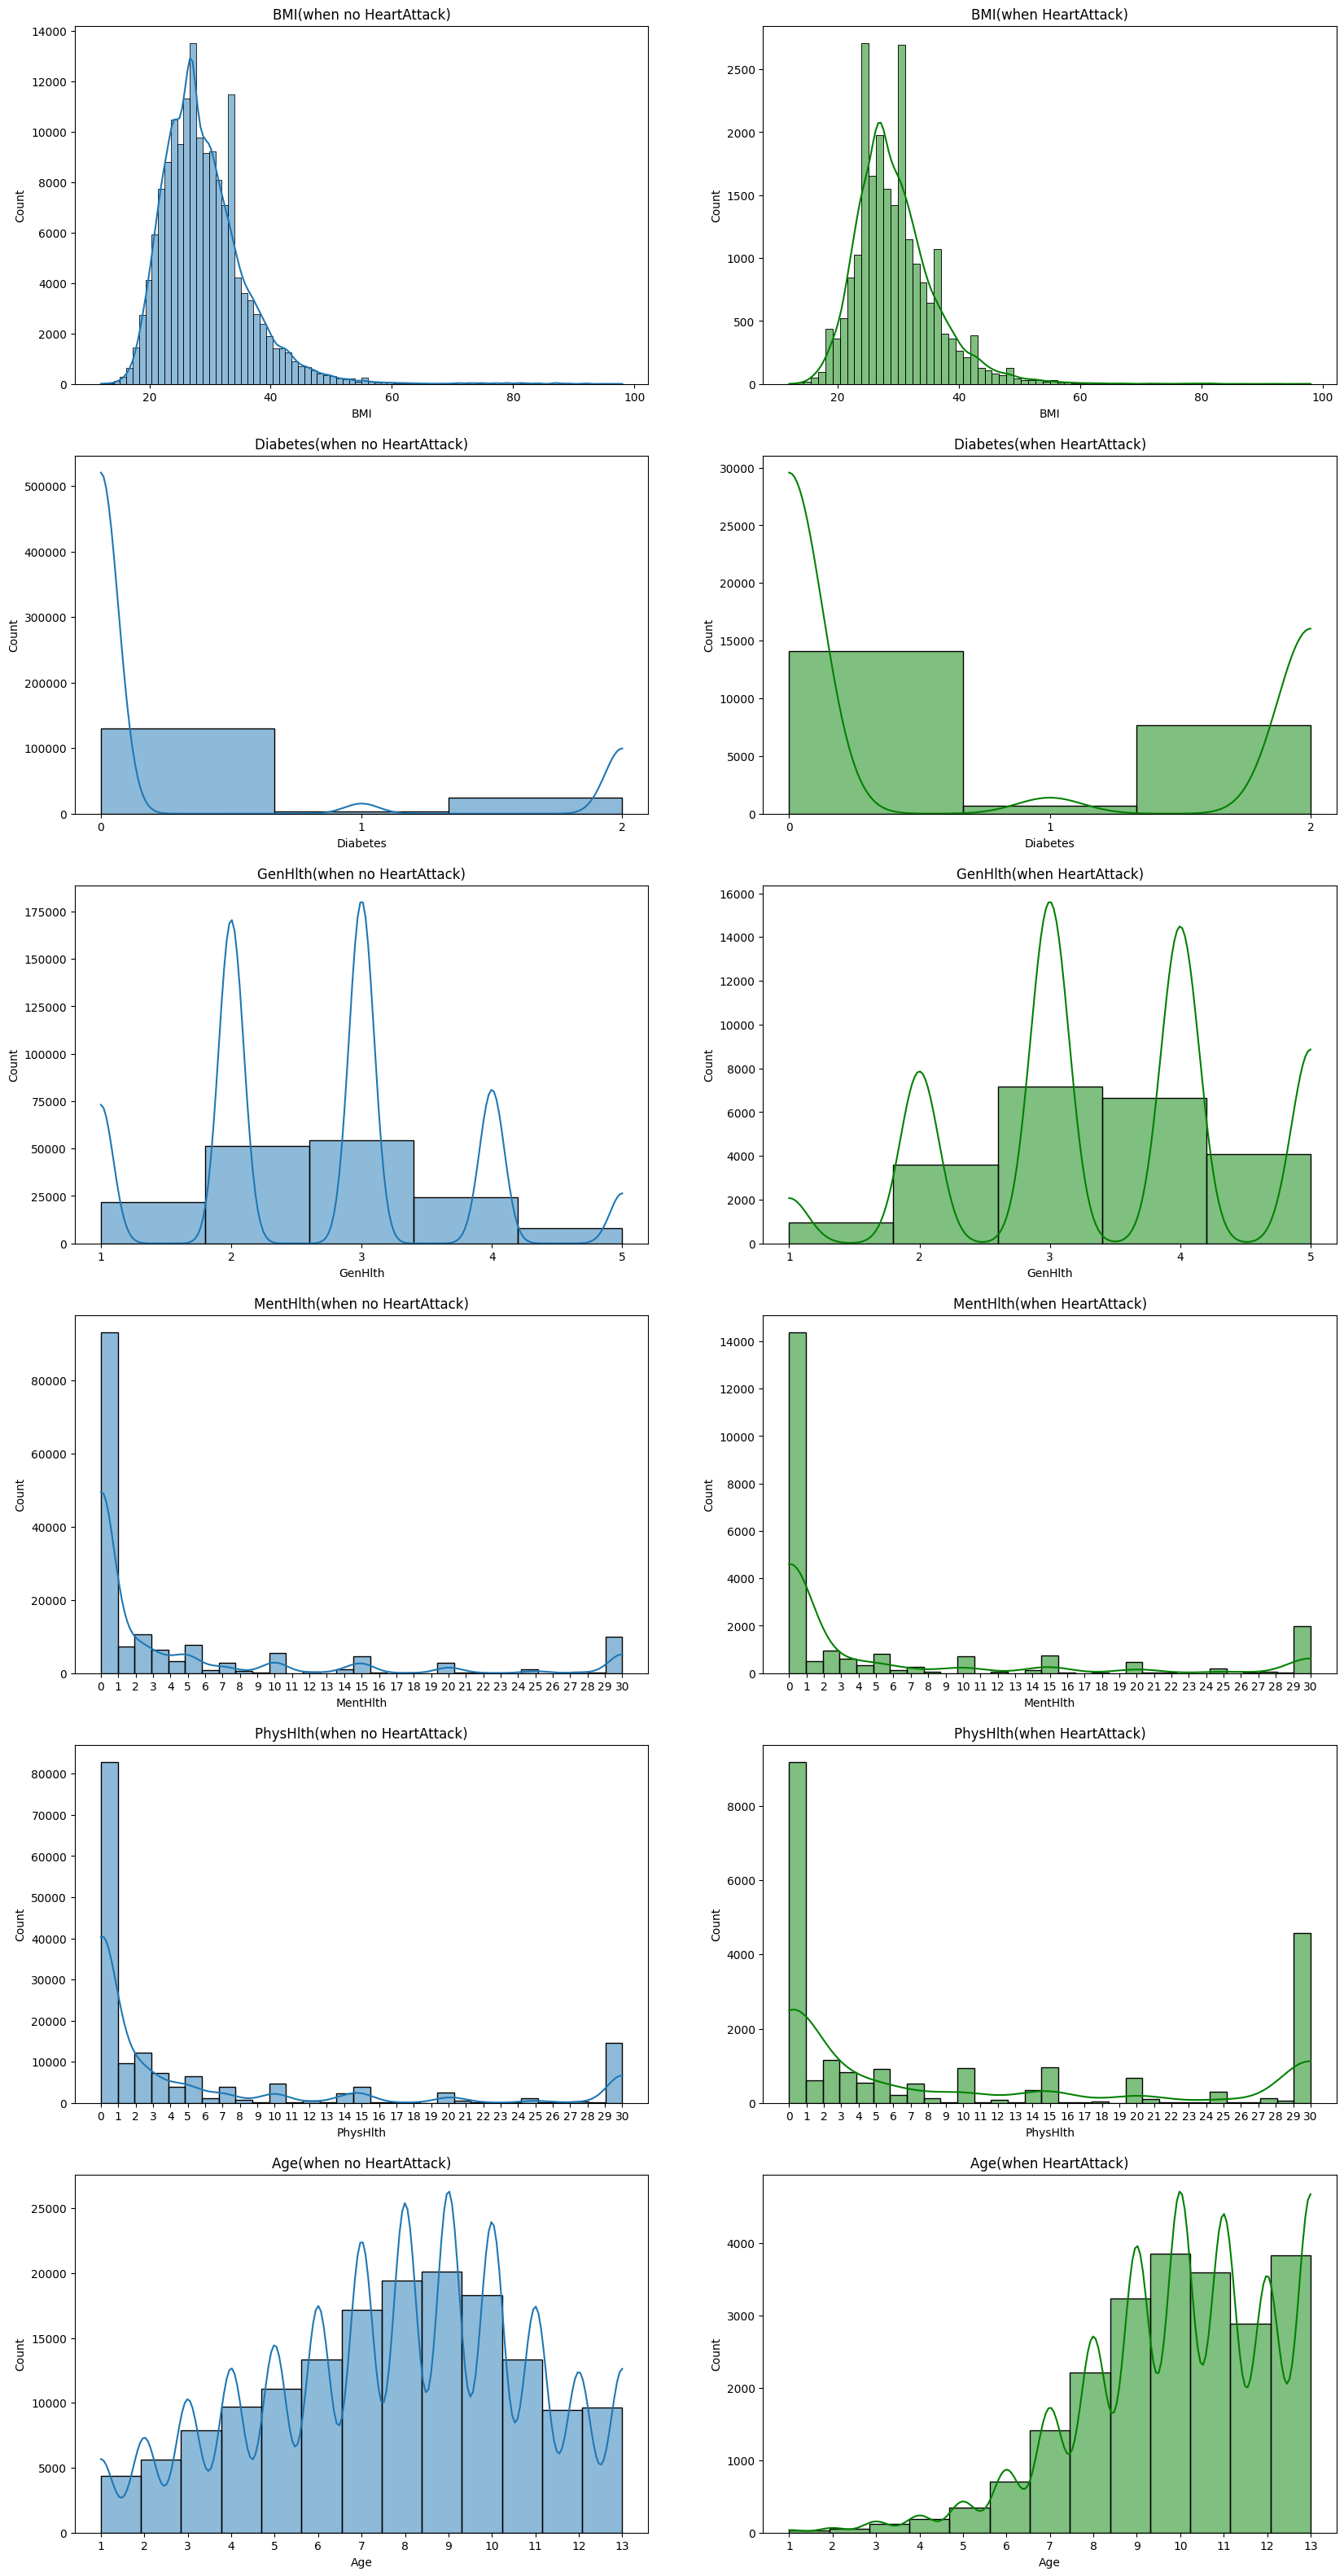

In [28]:
#Plotting distribution for both when y = 0 and y = 1
plt.figure(figsize = (20, 40))
i = 0
for feature in other_cols:
    #distribution for y = 0
    i += 1
    plt.subplot(6, 2, i)
    sns.histplot(data = data_when0[feature], bins = data_when0[feature].nunique(), kde = True)
    if(feature != "BMI"): #xticks get messy as uniques = 84
        plt.xticks(data_when0[feature].unique())
    plt.title(f"{feature}(when no HeartAttack)")
    
    #distribution for y = 1
    i += 1
    plt.subplot(6, 2, i)
    sns.histplot(data = data_when1[feature], bins = data_when1[feature].nunique(), color = "green",
                kde = True)
    if(feature != "BMI"):
        plt.xticks(data_when1[feature].unique())
    plt.title(f"{feature}(when HeartAttack)")

### Report:


> `BMI` and `MentHlth`: Distribution of both the graphs is almost the same in both cases.

> `Age`: People suffering from heart attacks have average higher weight the graph is clearly negatively skewed.

> `GenHlth`, `Diabetes` and `PhysHlth`: Patients tend to be diabetic, have worse GenHlth and have worse PhysHlth(the peak at 30) before their HeartAttack.

# 3. Train-Test Split

In [29]:
#train-test split
X_OG_train, X_OG_test, y_OG_train, y_OG_test = train_test_split(X, y,
                                            test_size = 0.1, random_state = 42)

Accuracy: 0.8732889890605244
ROC-AUC Score: 0.5
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     15886
           1       0.00      0.00      0.00      2305

    accuracy                           0.87     18191
   macro avg       0.44      0.50      0.47     18191
weighted avg       0.76      0.87      0.81     18191



C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


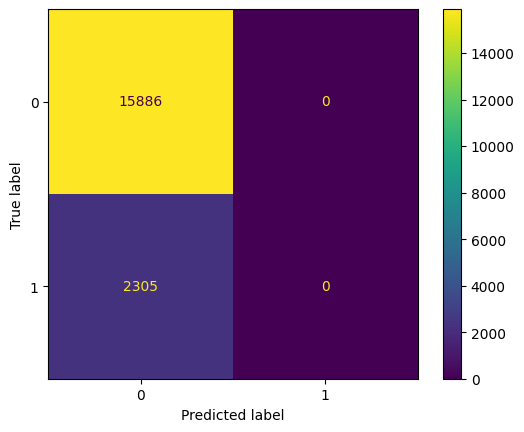

In [38]:
#WE can gain an accuracy score as high as 87% just by predicting the majority class
#However this is not great for real life purposes
allzeros = np.zeros(len(y_OG_test))
score = roc_auc_score(y_OG_test, allzeros)
accuracy = accuracy_score(y_OG_test, allzeros)
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {score}")
ConfusionMatrixDisplay.from_predictions(y_OG_test, allzeros)
print(classification_report(y_OG_test, allzeros))

# 4. Export csvs

In [84]:
train = pd.concat([X_nonbin_train, y_nonbin_train], axis = 1)
test = pd.concat([X_nonbin_test, y_nonbin_test], axis = 1)

In [85]:
train.reset_index(drop = True, inplace = True)

In [86]:
test.reset_index(drop = True, inplace = True)

In [87]:
train.to_csv("reduced_train.csv", index = False)

In [88]:
test.to_csv("reduced_test.csv", index = False)